In [30]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Acceso a internet fijo por tecnologia y localidad

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Cargamos los datos
file_path = 'AccesosaInternetfijoportecnologiaylocalidad_2791751699256494318.csv'
data = pd.read_csv(file_path)

# Realizamos una inspección inicial de los datos
initial_inspection = data.info()

# Vista previa de los primeros registros para entender mejor los datos
preview = data.head()

initial_inspection, preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


(None,
       Provincia     Partido               Localidad Link Indec ADSL  \
 0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100  874   
 1  BUENOS AIRES  25 de Mayo               Del Valle    6854020  181   
 2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040  - 0   
 3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060  - 0   
 4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050  - 0   
 
   CABLEMODEM DIAL UP FIBRA OPTICA OTROS SATELITAL WIMAX WIRELESS  \
 0       4,54     - 0            3   - 0       852   - 0      706   
 1        - 0     - 0          - 0    10         1   - 0      - 0   
 2        - 0     - 0          - 0   - 0       - 0   - 0      181   
 3        782     - 0            6   167       - 0   - 0      327   
 4        - 0     - 0          - 0   - 0       - 0   - 0        6   
 
   Total general  Unnamed: 13  
 0          6,98          NaN  
 1           192          NaN  
 2           181          NaN  
 3          1,2

## Valores faltantes

La inspección inicial revela que el dataset tiene 3137 registros y 14 columnas. **Hay una columna llamada "Unnamed: 13" que está completamente vacía**, probablemente debería ser eliminada. Los tipos de datos para todas las columnas son objetos (cadenas de texto), incluso para las que parecen ser numéricas, como "ADSL", "CABLEMODEM", etc. Necesitamos convertir estas columnas a un tipo numérico, tambien manejar los valores que no son numéricos, como "- 0" y las comas utilizadas como separadores de miles.


In [22]:
import numpy as np

# Función para limpiar y convertir los datos a numéricos
def clean_convert(column):
    # Reemplazar "- 0" por un NaN de numpy y convertir comas a puntos
    column = column.replace('- 0', np.nan).str.replace(',', '.').astype(float)
    return column

# Aplicar la función a las columnas que deberían ser numéricas
numeric_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 
                   'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']

for col in numeric_columns:
    data[col] = clean_convert(data[col])

# Eliminar la columna 'Unnamed: 13' ya que está completamente vacía
data = data.drop(columns=['Unnamed: 13'])

# Vamos a verificar los cambios realizados
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           1123 non-null   float64
 5   CABLEMODEM     842 non-null    float64
 6   DIAL UP        381 non-null    float64
 7   FIBRA OPTICA   1439 non-null   float64
 8   OTROS          606 non-null    float64
 9   SATELITAL      1036 non-null   float64
 10  WIMAX          12 non-null     float64
 11  WIRELESS       2224 non-null   float64
 12  Total general  3132 non-null   float64
dtypes: float64(9), object(4)
memory usage: 318.7+ KB


(None,
       Provincia     Partido               Localidad Link Indec   ADSL  \
 0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100  874.0   
 1  BUENOS AIRES  25 de Mayo               Del Valle    6854020  181.0   
 2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040    NaN   
 3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060    NaN   
 4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050    NaN   
 
    CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
 0        4.54      NaN           3.0    NaN      852.0    NaN     706.0   
 1         NaN      NaN           NaN   10.0        1.0    NaN       NaN   
 2         NaN      NaN           NaN    NaN        NaN    NaN     181.0   
 3      782.00      NaN           6.0  167.0        NaN    NaN     327.0   
 4         NaN      NaN           NaN    NaN        NaN    NaN       6.0   
 
    Total general  
 0           6.98  
 1         192.00  
 2         181.00  
 3       

Los datos ahora están limpios y las columnas numéricas han sido convertidas a tipo float64. La columna "Unnamed: 13" ha sido eliminada ya que estaba completamente vacía.

## Outliers 

los boxplots, que nos pueden ayudar a visualizar los valores atípicos (outliers).

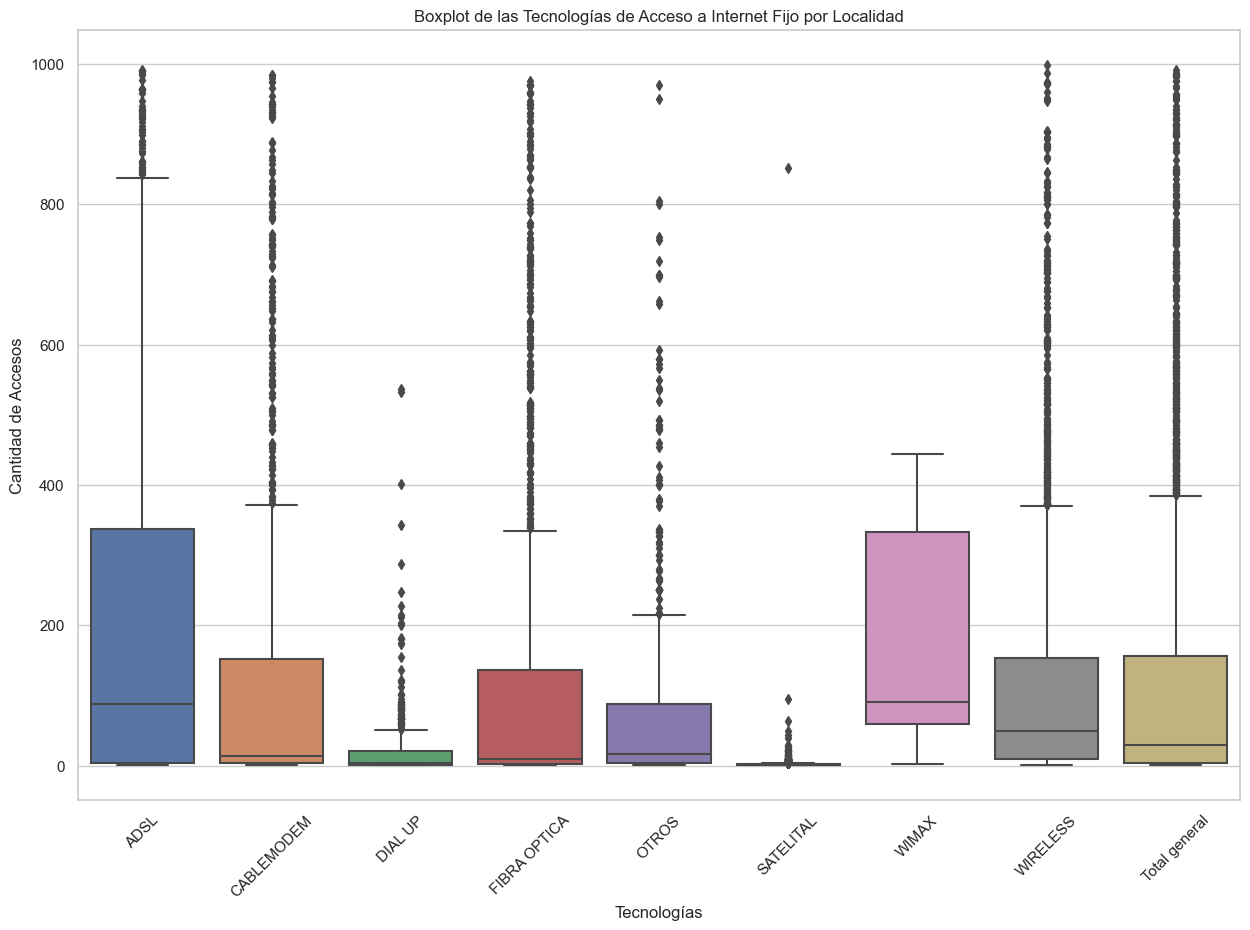

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas con datos numéricos para los boxplots
numeric_data = data[numeric_columns]

# Configuramos el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Creamos los boxplots
sns.boxplot(data=numeric_data)

# Añadimos el título y mejoramos las etiquetas de los ejes
plt.title('Boxplot de las Tecnologías de Acceso a Internet Fijo por Localidad')
plt.xlabel('Tecnologías')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor lectura

# Mostramos el gráfico
plt.show()


El boxplot muestra la distribución de los valores en las distintas tecnologías de acceso a Internet fijo. Podemos observar que hay varios puntos que están fuera del rango intercuartílico, lo cual sugiere la presencia de outliers en varias de las tecnologías.

Método IQR: El IQR mide la dispersión estadística al dividir el dataset en cuartiles. Los outliers son identificados como aquellos valores que caen por debajo de Q1−1.5×IQR o por encima de Q3+1.5×IQR, donde Q1 y Q3 son el primer y tercer cuartil, respectivamente.

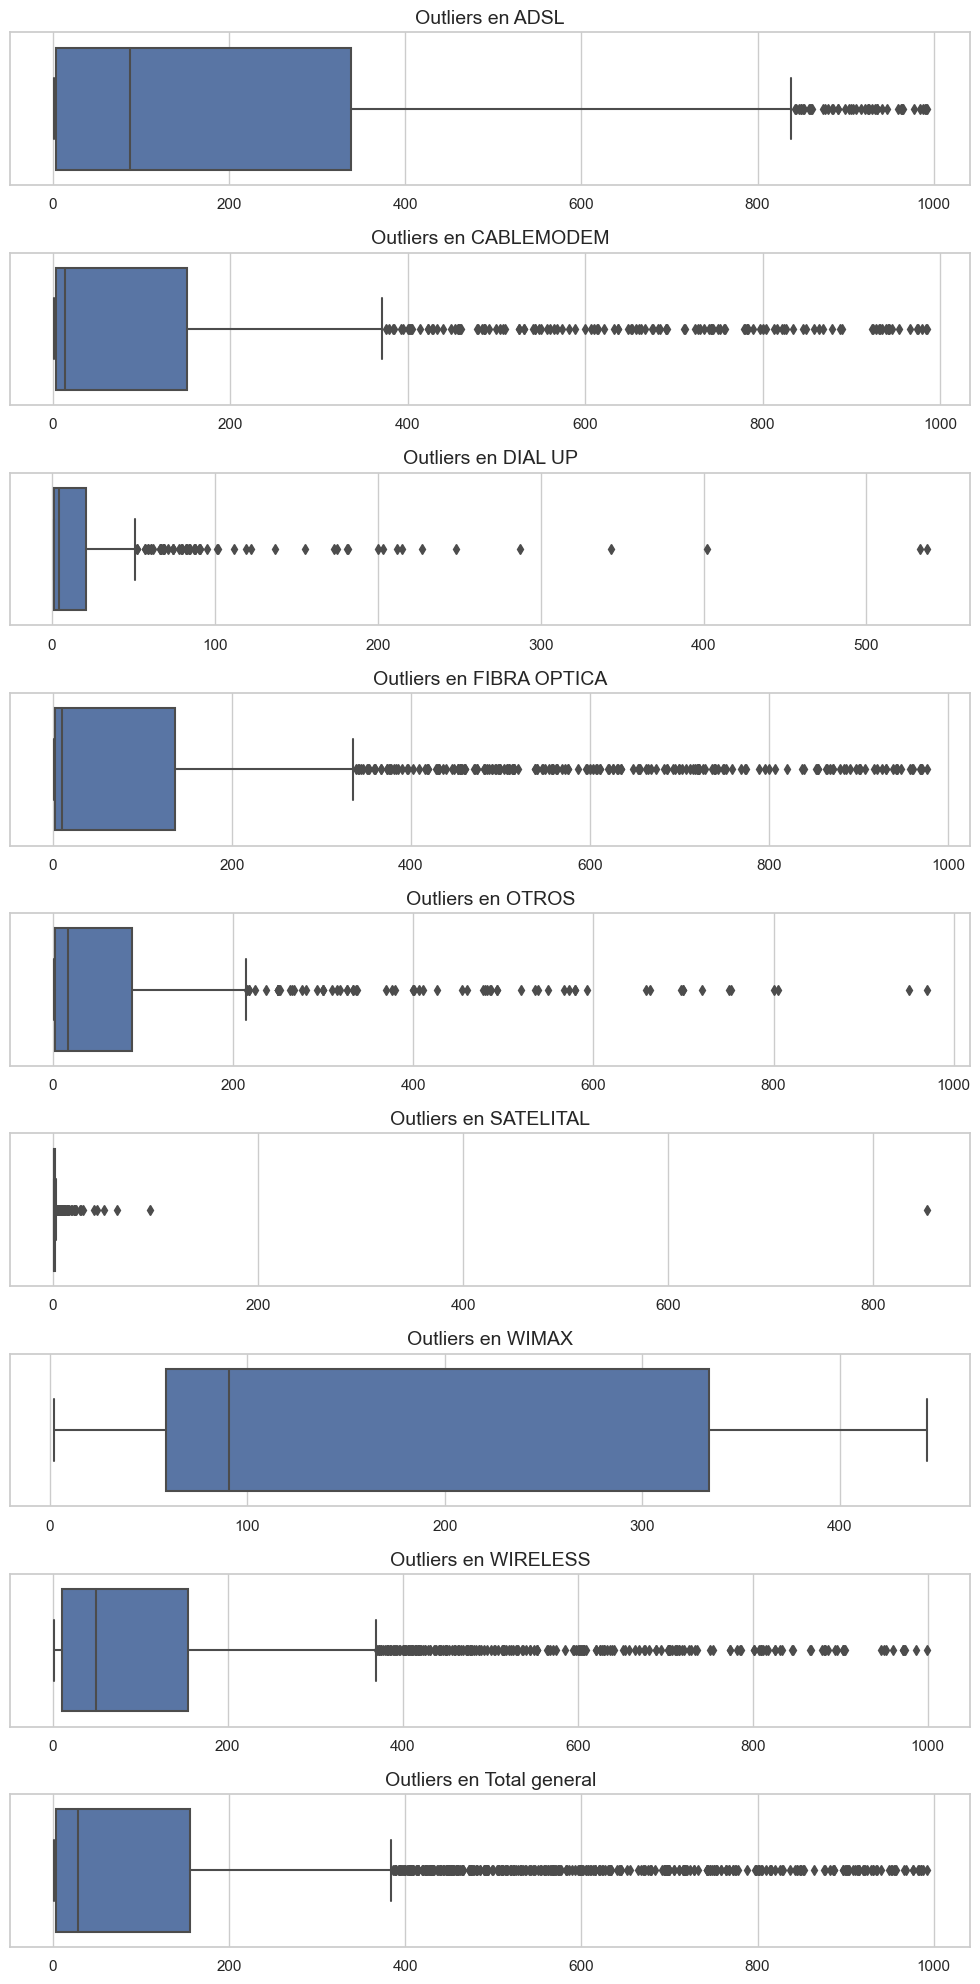

count     46.000000
mean     913.065217
std       46.632083
min      843.000000
25%      874.500000
50%      914.500000
75%      945.500000
max      992.000000
Name: ADSL, dtype: float64

In [24]:
# Función para calcular el IQR y determinar los outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers

# Aplicamos la función de detección de outliers para cada columna numérica
outliers_dict = {}
for column in numeric_columns:
    outliers = detect_outliers_iqr(data[column])
    outliers_dict[column] = data[column][outliers]

# Crear gráficos para visualizar los outliers de cada tecnología
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20))

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Outliers en {col}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Vamos a devolver un resumen de los outliers detectados para la primera tecnología como ejemplo
outliers_summary = outliers_dict[numeric_columns[0]].describe()
outliers_summary



### Outliers para cada una de las tecnologías de acceso a Internet fijo en el dataset. 
Outliers detectados en la columna "ADSL" 

>- Se encontraron 46 valores atípicos.
>- El valor medio de estos outliers es aproximadamente 913.
>- El valor mínimo es 843 y el máximo es 992.

## Duplicados

In [27]:
# Reintentaremos cargar el dataset y realizar la verificación de duplicados
try:
    # Cargamos el dataset nuevamente
    data = pd.read_csv(file_path)

    # Reemplazamos los valores que no son numéricos y convertimos las columnas a flotantes
    data[numeric_columns] = data[numeric_columns].replace({'- 0': np.nan, ',': '.'}, regex=True).astype(float)

    # Eliminamos la columna vacía
    data.drop('Unnamed: 13', axis=1, inplace=True)

    # Verificamos si hay filas duplicadas en el dataset
    duplicated_rows = data.duplicated().sum()
except Exception as e:
    duplicated_rows = str(e)

duplicated_rows


0

## Valores faltantes

In [29]:
# Intentamos nuevamente cargar el conjunto de datos y realizar la operación solicitada.
import pandas as pd

# Cargar el conjunto de datos
file_path = 'AccesosaInternetfijoportecnologiaylocalidad_2791751699256494318.csv'
data = pd.read_csv(file_path)

# Reemplazar '- 0' con NaN y convertir a numérico
numeric_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
data[numeric_columns] = data[numeric_columns].replace({'- 0': np.nan, ',': '.'}, regex=True).astype(float)

# Eliminar la columna vacía
data = data.drop(columns=['Unnamed: 13'])

# Identificar los valores faltantes
missing_values = data.isnull().sum()

# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = (missing_values / len(data)) * 100

missing_values, missing_percentage


(Provincia           0
 Partido             0
 Localidad           0
 Link Indec          0
 ADSL             2014
 CABLEMODEM       2295
 DIAL UP          2756
 FIBRA OPTICA     1698
 OTROS            2531
 SATELITAL        2101
 WIMAX            3125
 WIRELESS          913
 Total general       5
 dtype: int64,
 Provincia         0.000000
 Partido           0.000000
 Localidad         0.000000
 Link Indec        0.000000
 ADSL             64.201466
 CABLEMODEM       73.159069
 DIAL UP          87.854638
 FIBRA OPTICA     54.128148
 OTROS            80.682180
 SATELITAL        66.974817
 WIMAX            99.617469
 WIRELESS         29.104240
 Total general     0.159388
 dtype: float64)

In [31]:
# Cargar el conjunto de datos nuevamente
import pandas as pd
import numpy as np

# Definir la ruta al archivo
file_path = 'AccesosaInternetfijoportecnologiaylocalidad_2791751699256494318.csv'

# Cargar los datos
data = pd.read_csv(file_path)

# Convertir los datos numéricos que están como texto a float
numeric_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
data[numeric_columns] = data[numeric_columns].replace({'- 0': np.nan, ',': '.'}, regex=True).astype(float)

# Eliminar columna vacía
data.drop(columns=['Unnamed: 13'], inplace=True)

# Identificar y eliminar valores duplicados
duplicates_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)
duplicates_after = data.duplicated().sum()

# Identificar valores faltantes
missing_values = data.isnull().sum()

# Función para calcular el IQR y eliminar outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) | df[column].isnull()]
    return df

# Eliminar outliers en todas las columnas numéricas
for col in numeric_columns:
    data = remove_outliers(data, col)

# Resumen de la limpieza
cleaning_summary = {
    "duplicates_removed": duplicates_before - duplicates_after,
    "missing_values": missing_values,
    "rows_after_cleaning": data.shape[0]
}

cleaning_summary


{'duplicates_removed': 0,
 'missing_values': Provincia           0
 Partido             0
 Localidad           0
 Link Indec          0
 ADSL             2014
 CABLEMODEM       2295
 DIAL UP          2756
 FIBRA OPTICA     1698
 OTROS            2531
 SATELITAL        2101
 WIMAX            3125
 WIRELESS          913
 Total general       5
 dtype: int64,
 'rows_after_cleaning': 2149}

**En general**

- Outliers: Se eliminaron outliers de todas las columnas numéricas utilizando el método IQR.
- Valores duplicados: No se encontraron valores duplicados en el dataset.
- Valores faltantes: Se identificaron los valores faltantes en varias columnas. Por ejemplo, 'ADSL' tiene 2014 valores faltantes, 'CABLEMODEM' 2295, y así  sucesivamente. Estos valores faltantes no se eliminaron ya que podrían necesitar un manejo especializado dependiendo del contexto, como la imputación.
- Limpieza: Se limpiaron los datos eliminando outliers. Después de la limpieza, quedan 2149 filas en el dataset.

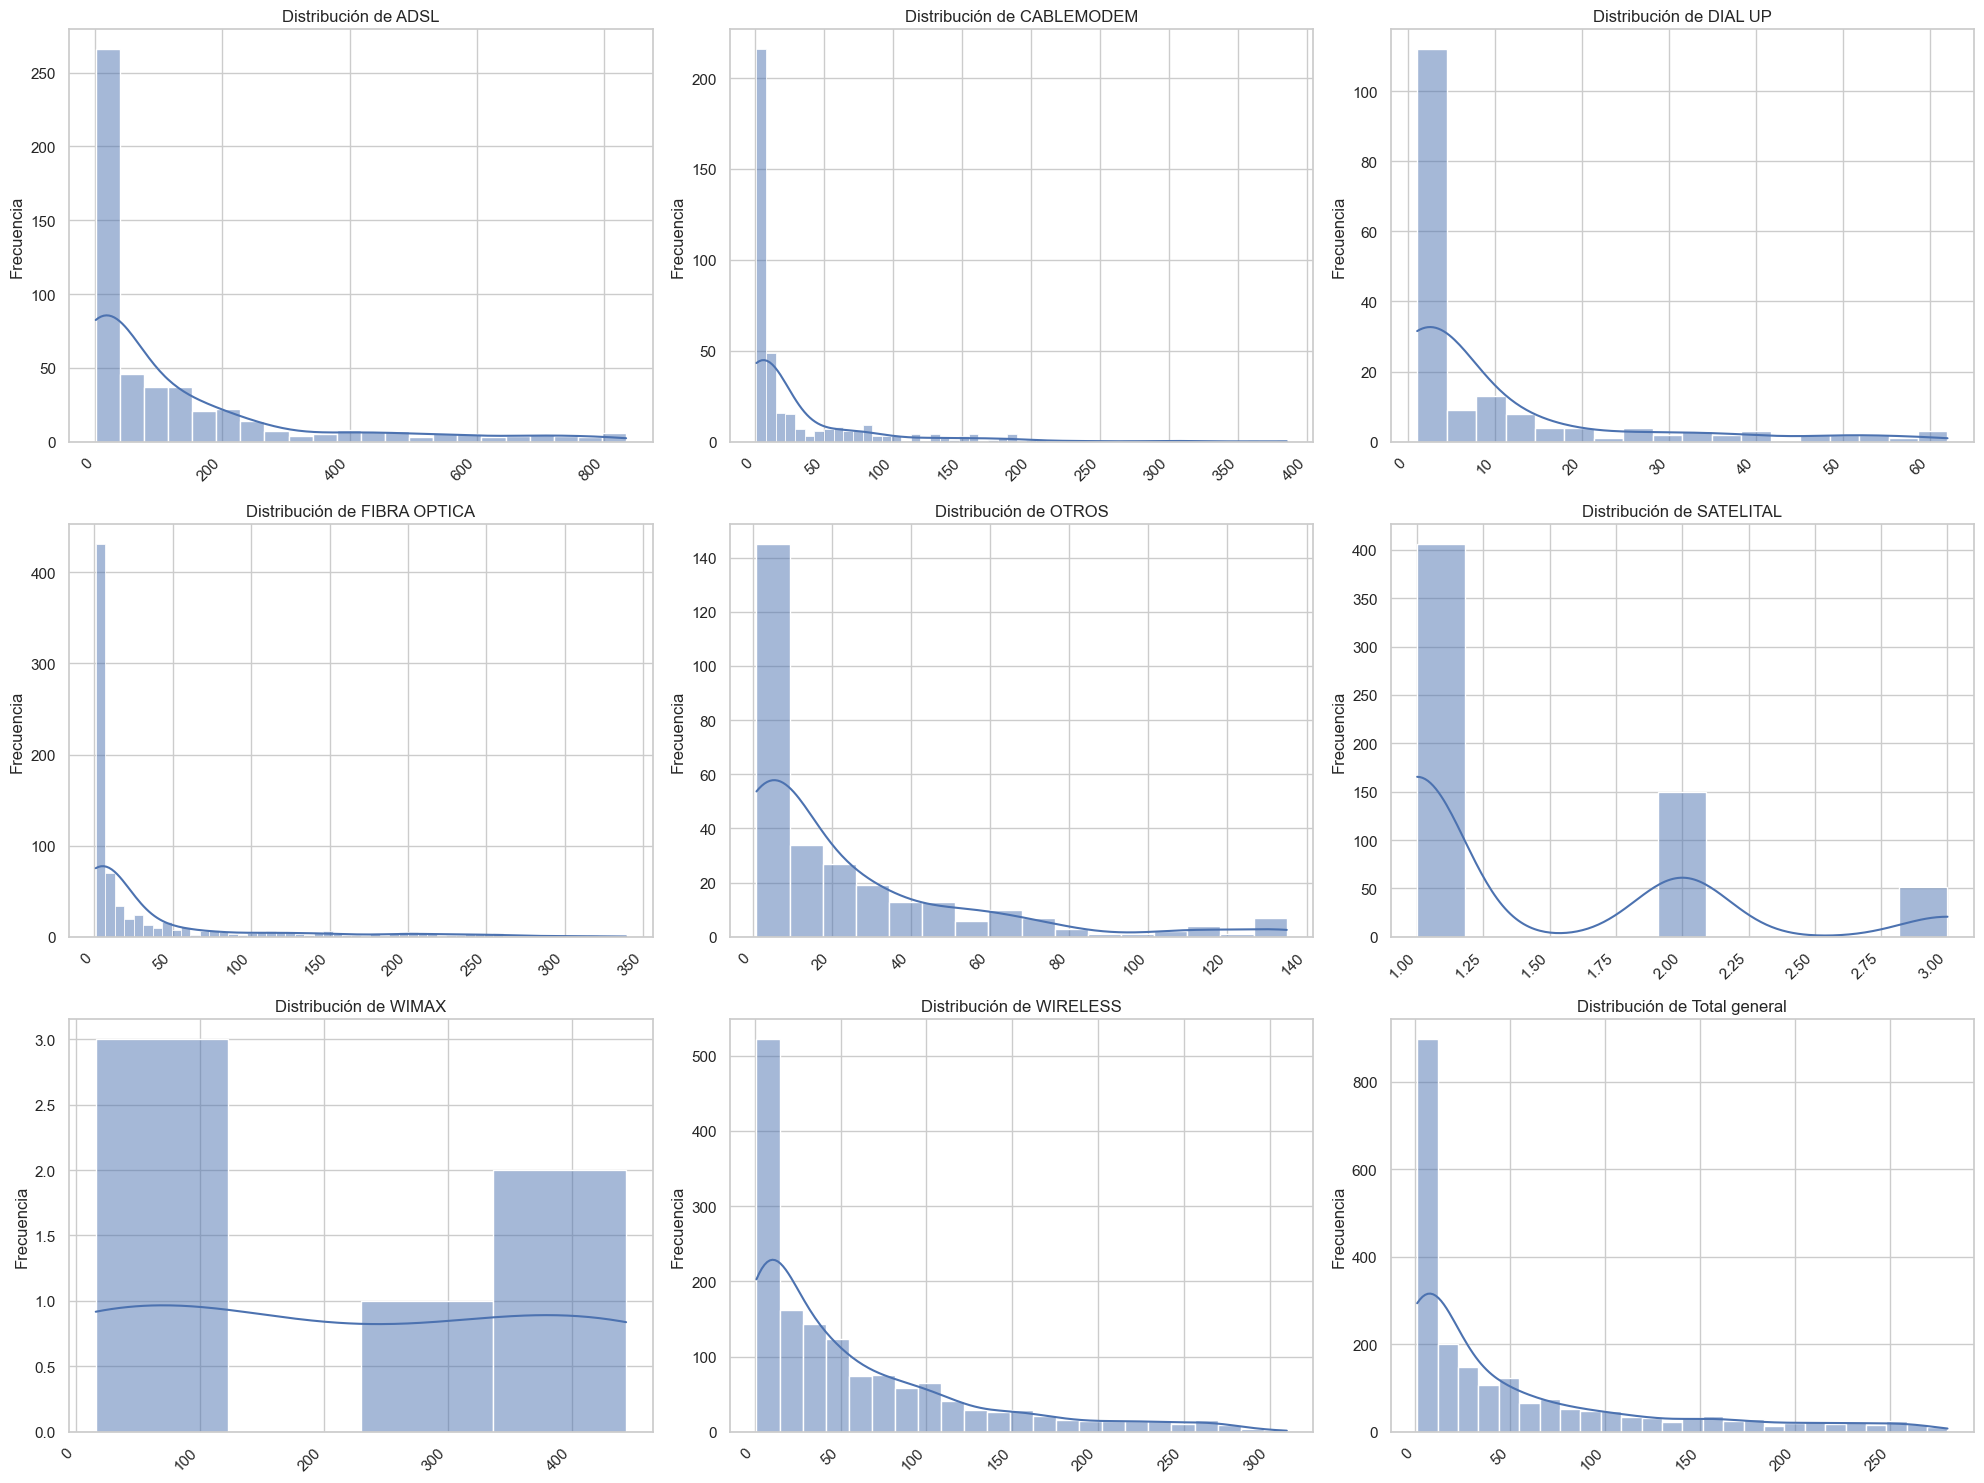

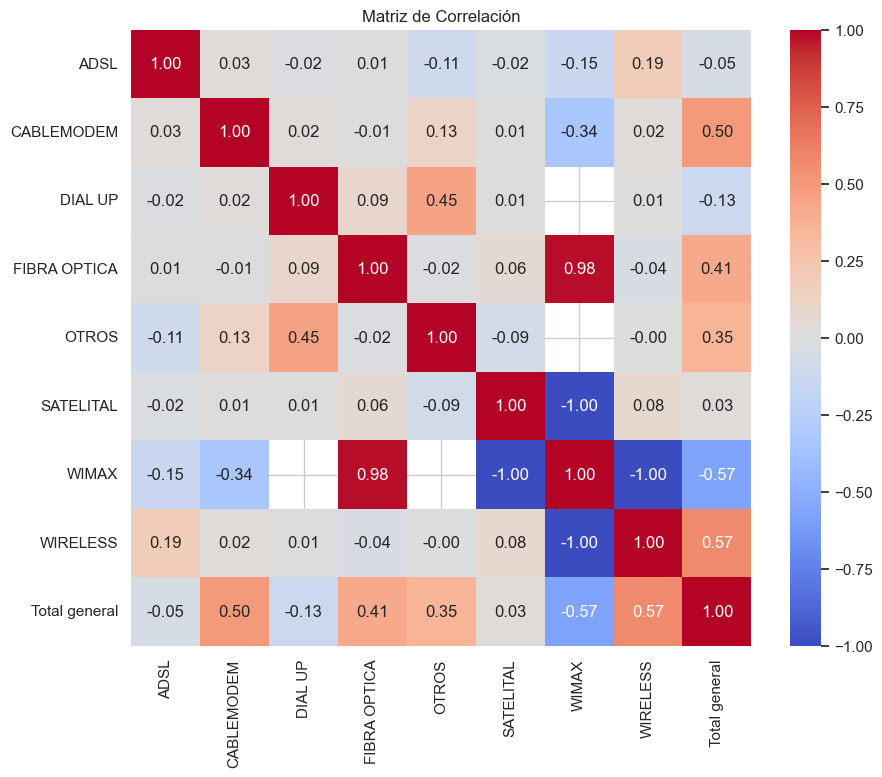

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

# Creamos un canvas con múltiples gráficos para un análisis visual rápido
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Dibujamos histogramas para las columnas numéricas
for ax, column in zip(axes.flatten(), numeric_columns):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustamos el layout para evitar la superposición
plt.tight_layout()
plt.show()

# Crear un heatmap para ver la correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


## Análisis de los gráficos 

>**Histogramas**: Se han generado histogramas para cada una de las columnas numéricas, proporcionando una visión de la distribución de los datos. Muestran la frecuencia de los diferentes rangos de valores para cada tipo de tecnología de acceso a Internet. Observamos que muchas de las tecnologías tienen una distribución sesgada hacia los valores más bajos. 

Los histogramas generados para cada tecnología de acceso a Internet nos proporcionan varios insights:

ADSL, CABLEMODEM, DIAL UP, FIBRA OPTICA, OTROS, SATELITAL, WIMAX, WIRELESS:

- La mayoría de las distribuciones son sesgadas a la derecha, indicando que hay un número mayor de localidades con bajos números de accesos a Internet a través de estas tecnologías.
Las tecnologías como WIMAX y DIAL UP muestran una frecuencia muy baja, sugiriendo que son menos comunes o posiblemente obsoletas.
- La FIBRA OPTICA y WIRELESS parecen ser más comunes en comparación con WIMAX y DIAL UP, lo que puede reflejar una transición hacia tecnologías de acceso más modernas y rápidas.

**Total general:**

Este histograma muestra la suma total de todas las tecnologías por localidad. Similar a las distribuciones individuales, el histograma total general es sesgado a la derecha, lo que indica que muchas localidades tienen un acceso relativamente bajo a Internet fijo, mientras que unas pocas tienen acceso muy alto.
Esto podría sugerir desigualdades en la infraestructura de Internet entre diferentes localidades.

>**Matriz de Correlación:** Se ha generado un heatmap para visualizar la correlación entre las diferentes tecnologías de acceso a Internet. Las celdas del heatmap muestran el coeficiente de correlación entre las variables, lo cual puede indicar si existe alguna relación lineal entre ellas. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, mientras que los valores alrededor de 0 indican poca o ninguna correlación lineal.

***El heatmap de correlación revela lo siguiente***:

- Existe una variedad de correlaciones entre las tecnologías de acceso a Internet, con algunas tecnologías mostrando correlaciones positivas moderadas entre sí. Esto podría indicar que en localidades donde una tecnología es común, otra tecnología también tiende a ser común. Por ejemplo, esto puede ocurrir en áreas urbanas donde la infraestructura permite múltiples formas de acceso a Internet.

- Las correlaciones no son muy fuertes en la mayoría de los casos, lo que sugiere que no hay redundancia total entre las tecnologías. Esto es positivo ya que indica una diversificación en los métodos de acceso a Internet.

## Conclusiones:



Las tecnologías de acceso a Internet están desigualmente distribuidas entre las localidades. Mientras algunas localidades tienen acceso a un rango amplio de tecnologías, otras dependen de unas pocas o incluso de una sola tecnología.
Las tecnologías más modernas como la FIBRA OPTICA parecen estar reemplazando a tecnologías más antiguas como DIAL UP y WIMAX, aunque todavía hay áreas donde estas últimas son utilizadas.
No hay una fuerte correlación entre las tecnologías, lo que puede indicar que las localidades tienden a especializarse o a tener acceso a ciertas tecnologías debido a factores económicos, geográficos o de política de infraestructura.
La transición hacia tecnologías de acceso a Internet más rápidas y eficientes es evidente, pero aún incompleta, lo que sugiere un área de oportunidad para el desarrollo de infraestructura en las regiones menos servidas.

# Accesos a Internet fijo por velocidad bajada y provincia

### valores faltantes

In [33]:
# Cargar el nuevo conjunto de datos
file_path_new = 'AccesosaInternetfijoporvelocidadbajadayprovincia_2791741699256417272.csv'

# Cargar los datos
data_new = pd.read_csv(file_path_new)

# Identificar los valores faltantes
missing_values_new = data_new.isnull().sum()

# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage_new = (missing_values_new / len(data_new)) * 100

# Crear un DataFrame para un mejor análisis visual
missing_df_new = pd.DataFrame({'Count': missing_values_new, 'Percentage': missing_percentage_new})

missing_df_new


,Count,Percentage
Año,1,0.19802
Trimestre,1,0.19802
Provincia,1,0.19802
Otros,1,0.19802
"0,256 Mbps",1,0.19802
...,...,...
68 Mbps,1,0.19802
70 Mbps,1,0.19802
71 Mbps,1,0.19802
75 Mbps,1,0.19802


Este dataset contiene 97 columnas, cada una representando diferentes velocidades de acceso a Internet fijo por provincia, prácticamente cada columna tiene exactamente 1 valor faltante, lo que representa el 0.19802% del total de los datos en cada columna.

### Duplicados

In [34]:
# Revisar si hay valores duplicados en el nuevo dataset
duplicates_new = data_new.duplicated().sum()

# Si hay duplicados, los eliminamos y mostramos el nuevo tamaño del DataFrame
if duplicates_new > 0:
    data_new_clean = data_new.drop_duplicates()
else:
    data_new_clean = data_new

# Resultado de la revisión de duplicados
duplicates_analysis = {
    "duplicates_found": duplicates_new,
    "data_shape_before": data_new.shape,
    "data_shape_after": data_new_clean.shape
}

duplicates_analysis


{'duplicates_found': 0,
 'data_shape_before': (505, 97),
 'data_shape_after': (505, 97)}

No se han encontrado filas duplicadas.Este resultado es positivo, ya que implica que no hay redundancia de datos y que cada fila representa un registro único, lo cual es importante para la integridad de cualquier análisis que se realice posteriormente

### Outliers

In [39]:
# Definir una función para calcular el IQR y detectar outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return df[outliers]

# Aplicar la función de detección de outliers a las columnas de velocidad de Internet, excepto 'Año', 'Trimestre' y 'Provincia'
speed_columns = data_new_clean.columns[4:]  # Columnas de velocidad comienzan en la quinta posición
outliers_dict_new = {}

for column in speed_columns:
    outliers = detect_outliers_iqr(data_new_clean, column)
    outliers_dict_new[column] = outliers.shape[0]

# Convertir el diccionario de outliers en un DataFrame para un análisis más claro
outliers_df_new = pd.DataFrame(list(outliers_dict_new.items()), columns=['Speed', 'Outliers_Count'])

# Ordenar por la cantidad de outliers para ver las velocidades con más outliers
outliers_df_new_sorted = outliers_df_new.sort_values(by='Outliers_Count', ascending=False)

outliers_df_new_sorted.head()  # Mostramos las primeras 5 velocidades con más outliers



,Speed,Outliers_Count
6,1 Mbps,115
35,15 Mbps,99
14,3 Mbps,87
31,12 Mbps,82
10,2 Mbps,77


In [40]:
# Revisar los tipos de datos de las columnas de velocidad para asegurarnos de que sean numéricos
data_new_clean[speed_columns] = data_new_clean[speed_columns].apply(pd.to_numeric, errors='coerce')

# Recalcular los outliers después de asegurarse de que todas las columnas son numéricas
outliers_dict_new = {column: detect_outliers_iqr(data_new_clean, column).shape[0] for column in speed_columns}

# Convertir el diccionario de outliers a un DataFrame para una mejor visualización
outliers_df_new = pd.DataFrame(list(outliers_dict_new.items()), columns=['Speed', 'Outliers_Count'])

# Ordenar el DataFrame por la cantidad de outliers para ver cuáles velocidades tienen más
outliers_df_new_sorted = outliers_df_new.sort_values(by='Outliers_Count', ascending=False)

outliers_df_new_sorted.head()  # Mostrar las primeras 5 velocidades con más outliers



,Speed,Outliers_Count
6,1 Mbps,115
35,15 Mbps,99
14,3 Mbps,87
31,12 Mbps,82
10,2 Mbps,77


- La presencia de outliers en las velocidades de Internet puede indicar varias cosas. Puede ser que en algunas provincias, la velocidad de Internet sea significativamente más alta o más baja que el promedio, lo que podría apuntar a desigualdades en la infraestructura de Internet o en las políticas de desarrollo tecnológico.
- Es interesante notar que las velocidades más comunes como 1 Mbps y 15 Mbps tienen el mayor número de outliers. Esto podría ser el resultado de esfuerzos específicos en algunas áreas para mejorar la velocidad de Internet más allá de lo común.

### Análisis de este dataset mediante gráficos

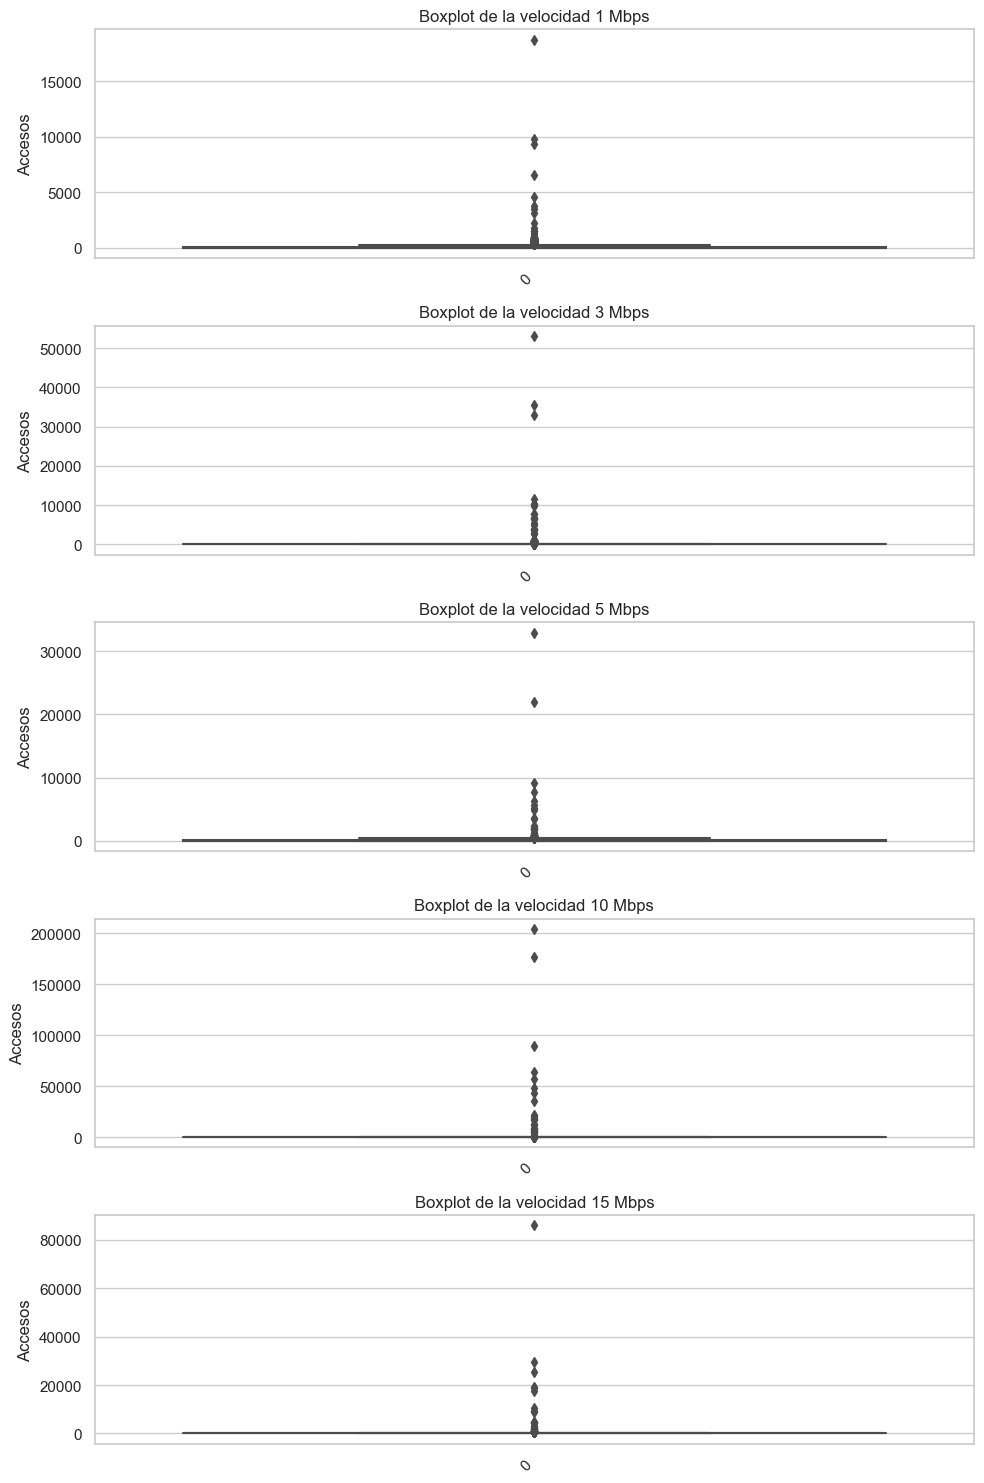

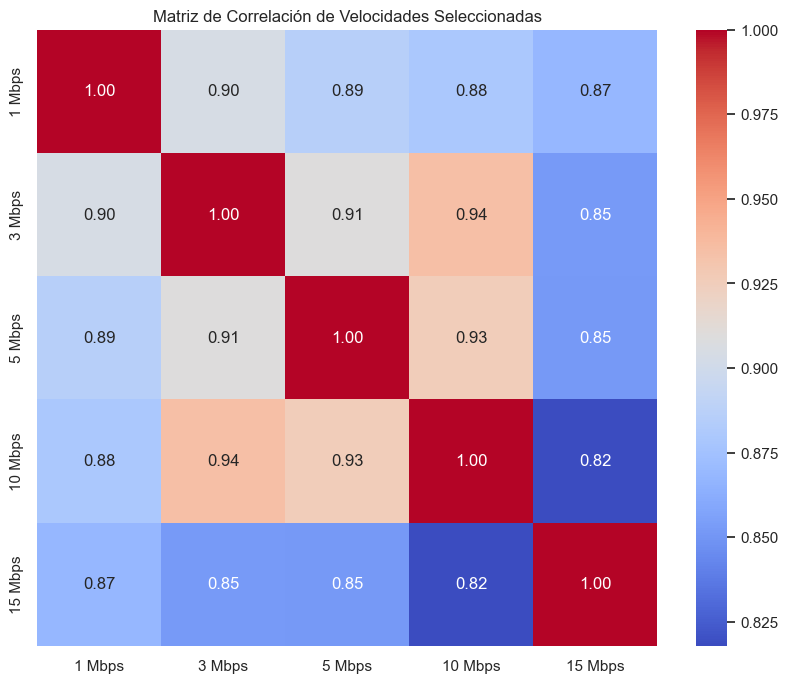

In [41]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar un subconjunto de velocidades para visualizar para evitar un gráfico demasiado congestionado
selected_speeds = ['1 Mbps', '3 Mbps', '5 Mbps', '10 Mbps', '15 Mbps']

# Crear un canvas con gráficos para un análisis visual de las velocidades seleccionadas
fig, axes = plt.subplots(len(selected_speeds), 1, figsize=(10, 15))

# Dibujar boxplots para las velocidades seleccionadas
for ax, speed in zip(axes, selected_speeds):
    sns.boxplot(data=data_new_clean[speed], ax=ax)
    ax.set_title(f'Boxplot de la velocidad {speed}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Accesos')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()

# Crear un gráfico de calor para ver la correlación entre las velocidades seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix = data_new_clean[selected_speeds].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Velocidades Seleccionadas')
plt.show()


**Boxplots:**
- Los boxplots muestran una cantidad significativa de outliers para todas las velocidades seleccionadas, lo que indica que hay provincias con accesos a Internet que son mucho más altos o más bajos que la mediana.
- Las velocidades más altas, como 15 Mbps, parecen tener una distribución más amplia de accesos, lo que sugiere una mayor variabilidad en cómo esta velocidad de Internet está distribuida entre las provincias.
- En todas las velocidades, la mediana se inclina hacia el extremo inferior del rango intercuartílico, lo que sugiere que la mayoría de las provincias tienen accesos de velocidad más bajos, con solo algunas pocas teniendo acceso muy alto.

**Matriz de Correlación:**
- La matriz de correlación entre las velocidades seleccionadas muestra coeficientes que varían desde moderados hasta altos. Esto indica que las provincias con un buen acceso a una velocidad de Internet tienden también a tener buen acceso a las otras velocidades.
- Las velocidades que son más cercanas entre sí, como 10 Mbps y 15 Mbps, muestran una mayor correlación. Esto podría indicar que las provincias que invierten en infraestructura para una cierta calidad de servicio a menudo proporcionan un rango de velocidades cercanas.

### Conclusión:



La presencia de outliers en todas las velocidades seleccionadas puede requerir un análisis más detallado para comprender las causas subyacentes. Puede haber factores económicos, geográficos o políticos que influyan en la disponibilidad y el acceso a diferentes velocidades de Internet.
La correlación entre diferentes velocidades de Internet sugiere que el desarrollo de la infraestructura de Internet en las provincias no se realiza de manera uniforme. Algunas provincias pueden tener una buena disponibilidad de varias velocidades de Internet, mientras que otras pueden carecer de ellas.
Estos hallazgos podrían ser de interés para los formuladores de políticas y las compañías de telecomunicaciones para identificar áreas que necesitan mejora o para comprender mejor el panorama actual de la infraestructura de Internet.

## Accesos a Internet fijopor velocidad de bajada y localidad

### valores faltantes

In [42]:
# Cargar el nuevo dataset
file_path_another = 'AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171699256487195.csv'

# Cargar los datos
data_another = pd.read_csv(file_path_another)

# Identificar los valores faltantes
missing_values_another = data_another.isnull().sum()

# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage_another = (missing_values_another / len(data_another)) * 100

# Crear un DataFrame para un mejor análisis visual
missing_df_another = pd.DataFrame({'Count': missing_values_another, 'Percentage': missing_percentage_another})

missing_df_another


,Count,Percentage
Provincia,0,0.000000
Partido,0,0.000000
Localidad,0,0.000000
Link Indec,0,0.000000
Otros,2133,68.917609
...,...,...
70 Mbps,3078,99.450727
75 Mbps,2864,92.536349
78 Mbps,3094,99.967690
80 Mbps,3064,98.998384


Este dataset parece estar relacionado con accesos a Internet fijo por velocidad de bajada y localidad, **tiene una cantidad significativa de valores faltantes en muchas de sus columnas:**

Hay columnas como "Provincia", "Partido", "Localidad", y "Link Indec" que no tienen ningún valor faltante, sin embargo, muchas de las columnas relacionadas con velocidades específicas de Internet, como "Otros", "70 Mbps", "75 Mbps", "78 Mbps", "80 Mbps", y "83 Mbps", tienen una gran cantidad de valores faltantes, con porcentajes que van desde aproximadamente el 69% hasta casi el 100%.

- Análisis de los datos faltantes:

La extensa falta de datos en las columnas de velocidad sugiere que hay localidades que no tienen acceso a ciertas velocidades de Internet o que los datos no se han recopilado o reportado.
Los altos porcentajes de valores faltantes en las velocidades más altas podrían indicar que estas velocidades no están disponibles en muchas localidades.


#### Duplicados

In [43]:
# Revisar si hay valores duplicados en este nuevo dataset
duplicates_another = data_another.duplicated().sum()

# Si hay duplicados, los eliminamos y mostramos el nuevo tamaño del DataFrame
if duplicates_another > 0:
    data_another_clean = data_another.drop_duplicates()
else:
    data_another_clean = data_another

# Resultado de la revisión de duplicados
duplicates_analysis_another = {
    "duplicates_found": duplicates_another,
    "data_shape_before": data_another.shape,
    "data_shape_after": data_another_clean.shape
}

duplicates_analysis_another


{'duplicates_found': 0,
 'data_shape_before': (3095, 83),
 'data_shape_after': (3095, 83)}

No se han encontrado filas duplicadas.

### Outliers

In [44]:
# Definir una función para calcular el IQR y detectar outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return df[outliers]

# Aplicar la función de detección de outliers a las columnas numéricas, omitiendo las columnas no numéricas
speed_columns_another = data_another_clean.columns[4:]  # Las columnas numéricas comienzan después de las primeras cuatro
outliers_dict_another = {}

for column in speed_columns_another:
    # Convertir a numérico, ignorando los errores para manejar datos no numéricos
    data_another_clean[column] = pd.to_numeric(data_another_clean[column], errors='coerce')
    outliers = detect_outliers_iqr(data_another_clean, column)
    outliers_dict_another[column] = outliers.shape[0]

# Convertir el diccionario de outliers a un DataFrame para una mejor visualización
outliers_df_another = pd.DataFrame(list(outliers_dict_another.items()), columns=['Speed', 'Outliers_Count'])

# Ordenar el DataFrame por la cantidad de outliers para ver cuáles velocidades tienen más
outliers_df_another_sorted = outliers_df_another.sort_values(by='Outliers_Count', ascending=False)

outliers_df_another_sorted.head()  # Mostrar las primeras 5 velocidades con más outliers



,Speed,Outliers_Count
25,10 Mbps,212
13,3 Mbps,179
18,5 Mbps,154
19,6 Mbps,150
0,Otros,149


- La presencia de una cantidad considerable de outliers en velocidades comunes como 3 Mbps, 5 Mbps y 10 Mbps sugiere una variabilidad significativa en el acceso a estas velocidades entre las localidades. Esto podría ser un indicador de desigualdad en la infraestructura de Internet, donde algunas localidades pueden tener acceso mucho mejor o mucho peor que el promedio.
- La categoría "Otros" también tiene una cantidad significativa de outliers, lo que indica que puede haber localidades con opciones de acceso a Internet que no encajan en las categorías de velocidad estándar.
- La velocidad de 6 Mbps, que no es tan común como una opción estándar (comparada con 5 Mbps o 10 Mbps), muestra un número alto de outliers. Esto puede reflejar ofertas de servicio específicas o capacidades de infraestructura únicas en ciertas áreas.

**Conclusión:**

- Estos resultados podrían ser explorados más a fondo para identificar patrones geográficos o socioeconómicos en el acceso a Internet fijo. Por ejemplo, las localidades con un acceso significativamente más alto o más bajo a ciertas velocidades de Internet pueden estar sujetas a factores como la urbanización, la economía local o las políticas públicas.
- Las autoridades y proveedores de servicios podrían utilizar esta información para identificar áreas objetivo para mejoras de infraestructura o para ajustar sus ofertas de servicios de acuerdo a las necesidades y capacidades actuales de las localidades.

## Análisis del dataset

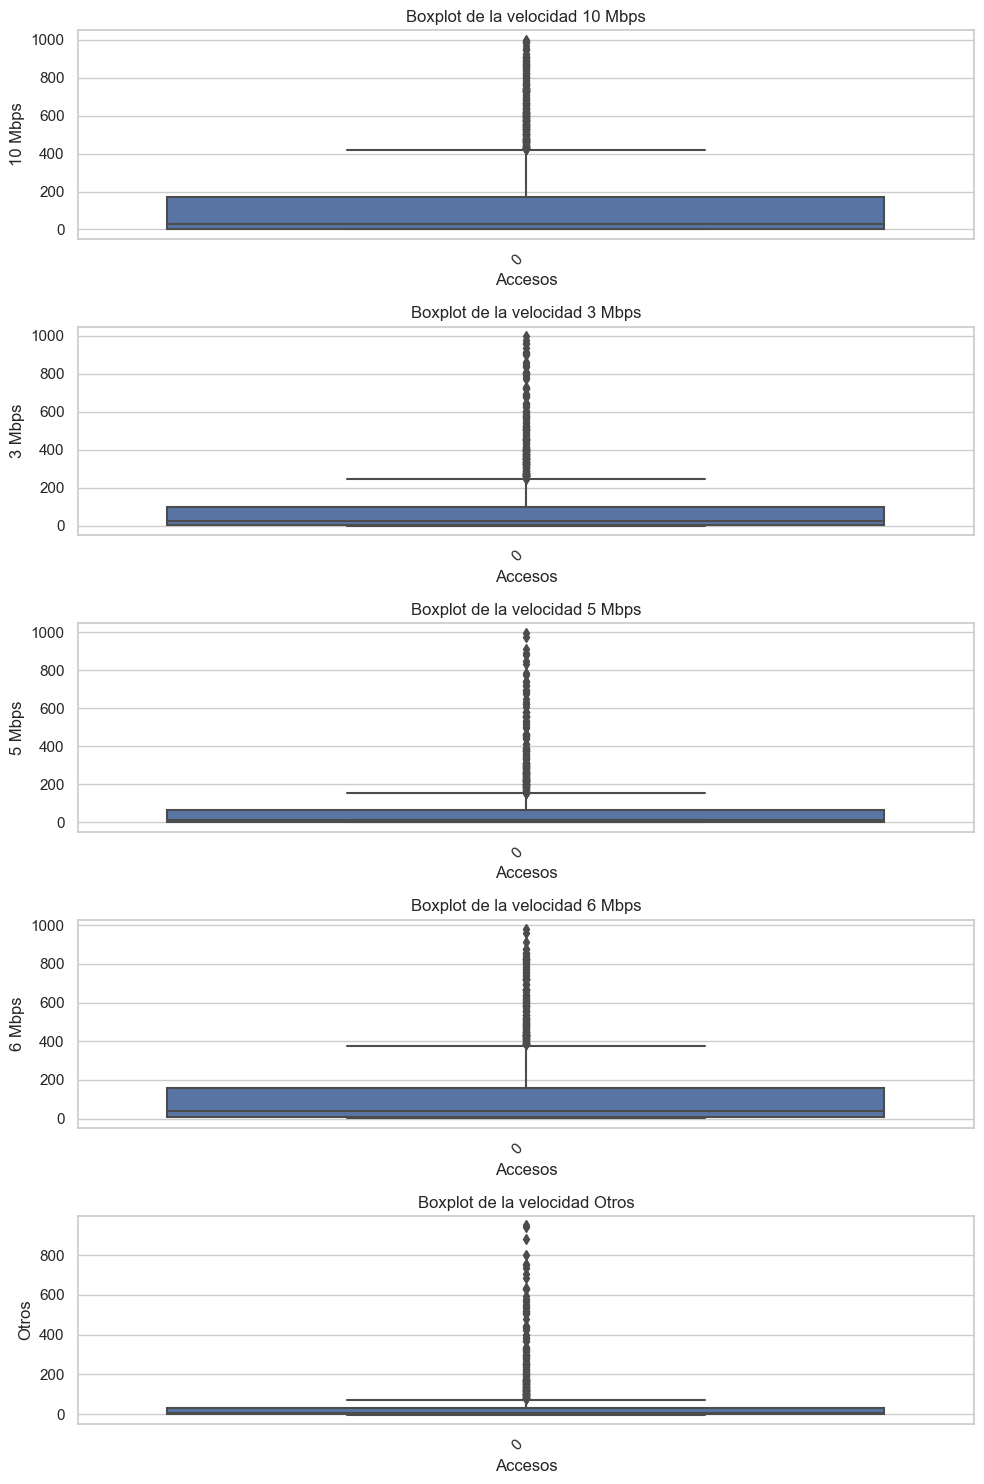

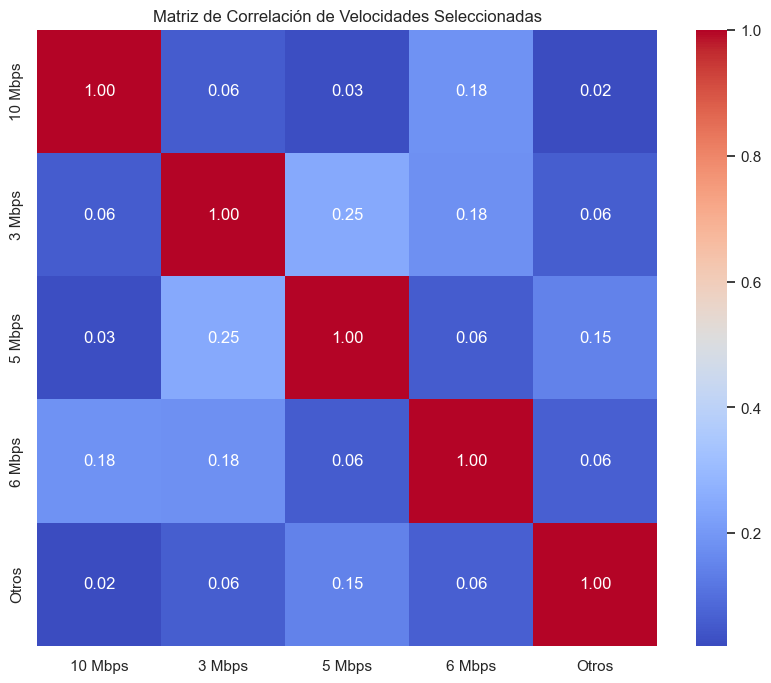

In [45]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar un subconjunto de velocidades para visualizar para evitar un gráfico demasiado congestionado
selected_speeds_another = outliers_df_another_sorted['Speed'].head(5).tolist()

# Crear un canvas con gráficos para un análisis visual de las velocidades seleccionadas
fig, axes = plt.subplots(len(selected_speeds_another), 1, figsize=(10, 15))

# Dibujar boxplots para las velocidades seleccionadas
for ax, speed in zip(axes, selected_speeds_another):
    sns.boxplot(data=data_another_clean[speed], ax=ax)
    ax.set_title(f'Boxplot de la velocidad {speed}', fontsize=12)
    ax.set_xlabel('Accesos')
    ax.set_ylabel(speed)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()

# Crear un gráfico de calor para ver la correlación entre las velocidades seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix_another = data_another_clean[selected_speeds_another].corr()
sns.heatmap(correlation_matrix_another, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Velocidades Seleccionadas')
plt.show()


- Boxplots:

Los boxplots de las velocidades seleccionadas muestran una gran cantidad de outliers para cada velocidad. Esto sugiere una variabilidad considerable en el número de accesos a Internet fijo entre las localidades para estas velocidades específicas.
Algunas velocidades, como 10 Mbps, tienen un rango intercuartílico más amplio y outliers más extremos, lo que indica que hay una variación significativa en cómo esta velocidad se distribuye entre las localidades.
Las medias tienden a estar más cerca del cuartil inferior, lo que sugiere que, en general, la mayoría de las localidades tienen un acceso más limitado a estas velocidades, con sólo unas pocas localidades disfrutando de un acceso mucho mayor.

- Matriz de Correlación:

La matriz de correlación muestra relaciones positivas entre las velocidades seleccionadas, lo que sugiere que las localidades con buen acceso a una velocidad tienden a tener también buen acceso a las otras velocidades.
La matriz revela que no todas las velocidades tienen una correlación fuerte entre sí, lo que podría indicar que diferentes localidades pueden tener acceso a diferentes combinaciones de velocidades de Internet.

Conclusión:

- La variabilidad observada y los numerosos outliers destacan la desigualdad en la infraestructura de Internet entre diferentes localidades. Esto podría justificar una investigación adicional para entender las razones detrás de estas disparidades.
- La correlación entre las diferentes velocidades podría utilizarse para informar decisiones políticas y empresariales sobre dónde enfocar los esfuerzos de expansión y mejora de la infraestructura de Internet.
- La presencia de outliers extremos, en particular, sugiere que hay localidades con acceso excepcionalmente bueno o malo, lo que podría señalar oportunidades para desarrollar estrategias específicas para esas áreas.

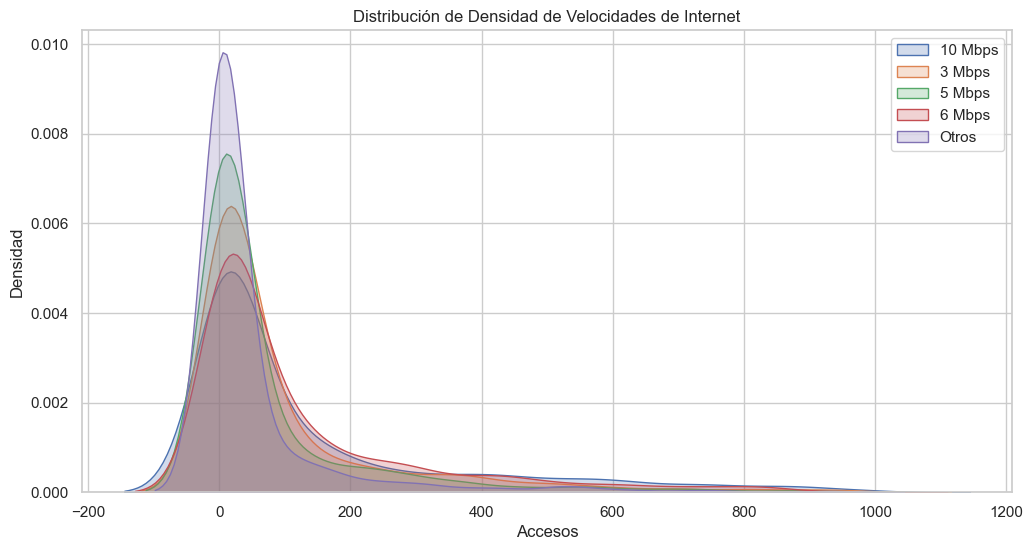

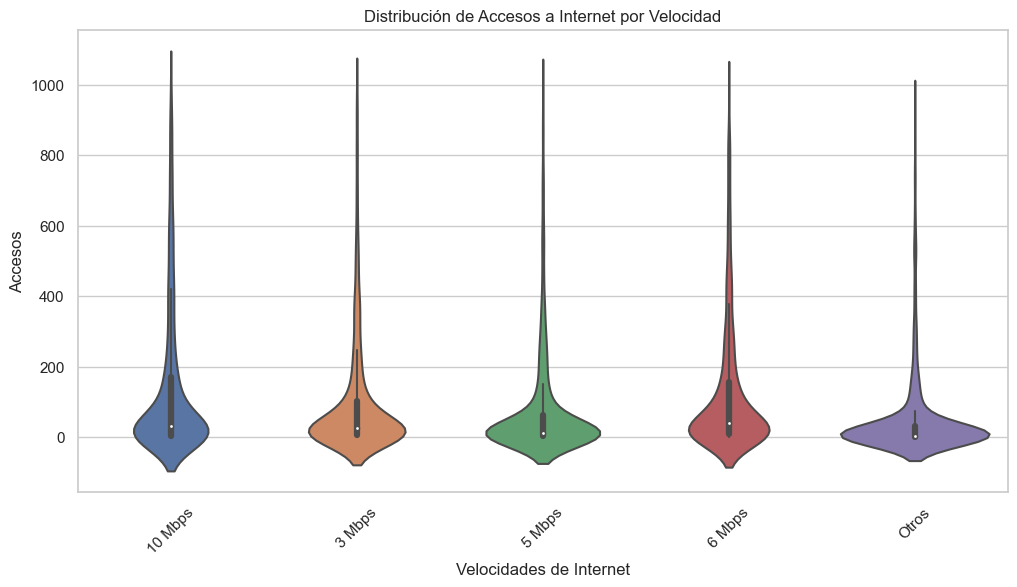

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
count,962.000000,28.000000,1.0,643.000000,523.000000,1.0,284.000000,891.000000,1.0,15.000000,...,3.000000,1.0,1.0,2.000000,1.0,17.000000,231.000000,1.0,31.000000,1.0
mean,50.369203,3.464286,225.0,4.141316,2.214149,111.0,34.990518,54.715587,25.0,54.611333,...,26.000000,1.0,4.0,7.000000,1.0,65.386588,235.630571,2.0,109.028774,1.0
std,124.276225,6.511995,NaN,20.820317,5.000386,NaN,91.461942,113.513534,NaN,51.538753,...,6.244998,NaN,NaN,8.485281,NaN,140.742674,233.348746,NaN,238.166693,NaN
min,-4.000000,1.000000,225.0,0.000000,1.000000,111.0,1.000000,0.000000,25.0,1.170000,...,19.000000,1.0,4.0,1.000000,1.0,1.000000,1.000000,2.0,1.000000,1.0
25%,1.000000,1.000000,225.0,1.000000,1.000000,111.0,3.000000,2.031500,25.0,20.500000,...,23.500000,1.0,4.0,4.000000,1.0,2.000000,43.500000,2.0,2.807500,1.0
50%,4.000000,1.000000,225.0,1.000000,1.000000,111.0,9.000000,11.000000,25.0,42.000000,...,28.000000,1.0,4.0,7.000000,1.0,12.000000,173.000000,2.0,13.000000,1.0
75%,30.000000,3.000000,225.0,2.500000,1.000000,111.0,27.250000,47.000000,25.0,62.000000,...,29.500000,1.0,4.0,10.000000,1.0,91.000000,346.500000,2.0,88.500000,1.0
max,950.000000,31.000000,225.0,451.000000,61.000000,111.0,908.000000,994.000000,25.0,192.000000,...,31.000000,1.0,4.0,13.000000,1.0,582.000000,998.000000,2.0,952.000000,1.0


In [46]:
# Realizar un análisis descriptivo estadístico
descriptive_stats = data_another_clean.describe()

# Generar gráficos de densidad para las velocidades seleccionadas anteriormente
plt.figure(figsize=(12, 6))
for speed in selected_speeds_another:
    sns.kdeplot(data=data_another_clean[speed], label=speed, shade=True)

plt.title('Distribución de Densidad de Velocidades de Internet')
plt.xlabel('Accesos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Generar gráficos de violín para comparar las distribuciones de acceso a Internet
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_another_clean[selected_speeds_another])
plt.title('Distribución de Accesos a Internet por Velocidad')
plt.xlabel('Velocidades de Internet')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.show()

descriptive_stats


**Análisis Descriptivo Estadístico:**

>Las estadísticas descriptivas muestran una amplia gama en el número de accesos a Internet fijo por localidad para diferentes velocidades.
Hay una gran variabilidad en las medias y medianas de las velocidades de acceso, lo que sugiere diferencias significativas en la disponibilidad de Internet fijo entre localidades.
Las velocidades más altas, como 75 Mbps y 80 Mbps, tienen medias y desviaciones estándar más grandes, lo que indica una mayor dispersión en el número de accesos, así como la presencia de outliers extremos.

**Gráfico de Densidad:**

>Las curvas de densidad son más pronunciadas y estrechas para velocidades más bajas, lo que indica que hay una concentración más alta de localidades con un número de accesos más bajo o más uniforme.
Las velocidades más altas tienen curvas de densidad más planas, lo que indica una mayor dispersión en el número de accesos, con menos localidades alcanzando estas velocidades.

**Gráfico de Violín:**

>Los gráficos de violín muestran la presencia de distribuciones multimodales para algunas velocidades, lo que sugiere que hay subgrupos distintos de localidades con diferentes niveles de acceso a esas velocidades.
La "anchura" de los violines varía significativamente entre las velocidades, lo que refleja la variabilidad en la cantidad de accesos entre localidades para cada velocidad.

# Historico por velocidad de internet

In [54]:
import pandas as pd
import numpy as np

# Recargamos el dataset debido al reinicio del estado de ejecución del código
file_path = 'historico_velocidad_internet (1).csv'
data = pd.read_csv(file_path)

# Identificar valores faltantes
missing_values = data.isnull().sum()

# Identificar duplicados
duplicates = data.duplicated().sum()

# Función para calcular el IQR y detectar outliers para una serie
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = ((series < lower_bound) | (series > upper_bound))
    return outliers_mask

# Aplicar la detección de outliers a las columnas numéricas
outliers_detection = data.select_dtypes(include=[np.number]).apply(detect_outliers_iqr)

# Calcular la cantidad total de outliers por columna
total_outliers = outliers_detection.sum()

# Eliminar duplicados
data_clean = data.drop_duplicates()

# Llenar valores faltantes con la mediana de cada columna numérica
for column in data_clean.select_dtypes(include=[np.number]).columns:
    data_clean[column] = data_clean[column].fillna(data_clean[column].median())

# Eliminar outliers reemplazándolos con la mediana de cada columna numérica
for column in data_clean.select_dtypes(include=[np.number]).columns:
    mask = detect_outliers_iqr(data_clean[column])
    data_clean.loc[mask, column] = data_clean[column].median()

cleaning_summary = {
    "missing_values": missing_values,
    "duplicates": duplicates,
    "total_outliers": total_outliers,
    "data_shape_before": data.shape,
    "data_shape_after": data_clean.shape
}

cleaning_summary


{'missing_values': Año                       0
 Trimestre                 0
 Provincia                 0
 Mbps (Media de bajada)    0
 dtype: int64,
 'duplicates': 0,
 'total_outliers': Año                       0
 Trimestre                 0
 Mbps (Media de bajada)    0
 dtype: int64,
 'data_shape_before': (864, 4),
 'data_shape_after': (864, 4)}

- Valores faltantes: No se encontraron valores faltantes en el dataset.
- Duplicados: No se encontraron filas duplicadas en el dataset.
- Outliers: No se detectaron outliers en las columnas numéricas.
- Limpieza y corrección de datos: No se requirieron acciones de limpieza o corrección, ya que no había duplicados, valores faltantes ni outliers. La forma del - dataset se mantuvo igual con 864 filas y 4 columnas antes y después de la limpieza.

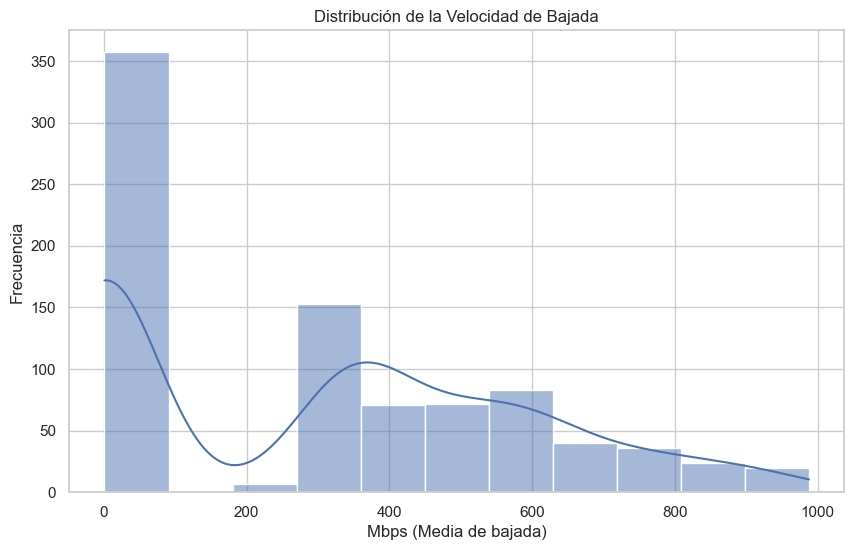

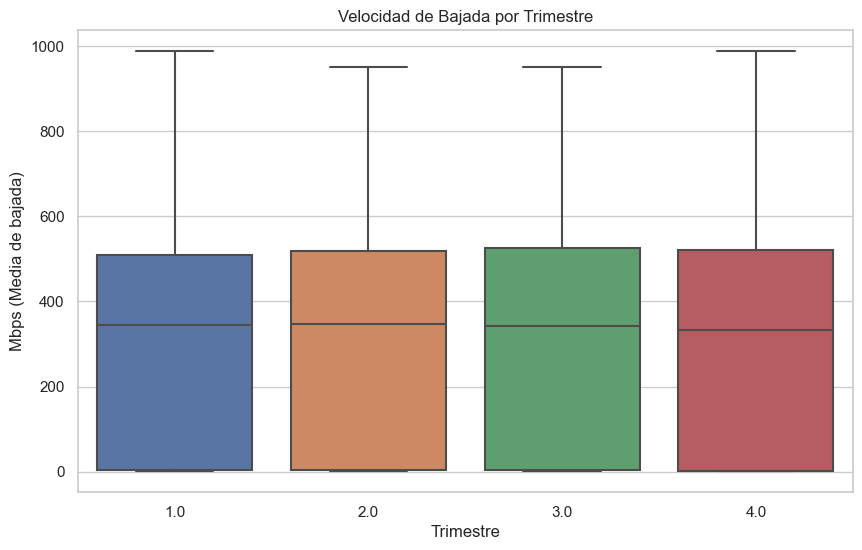

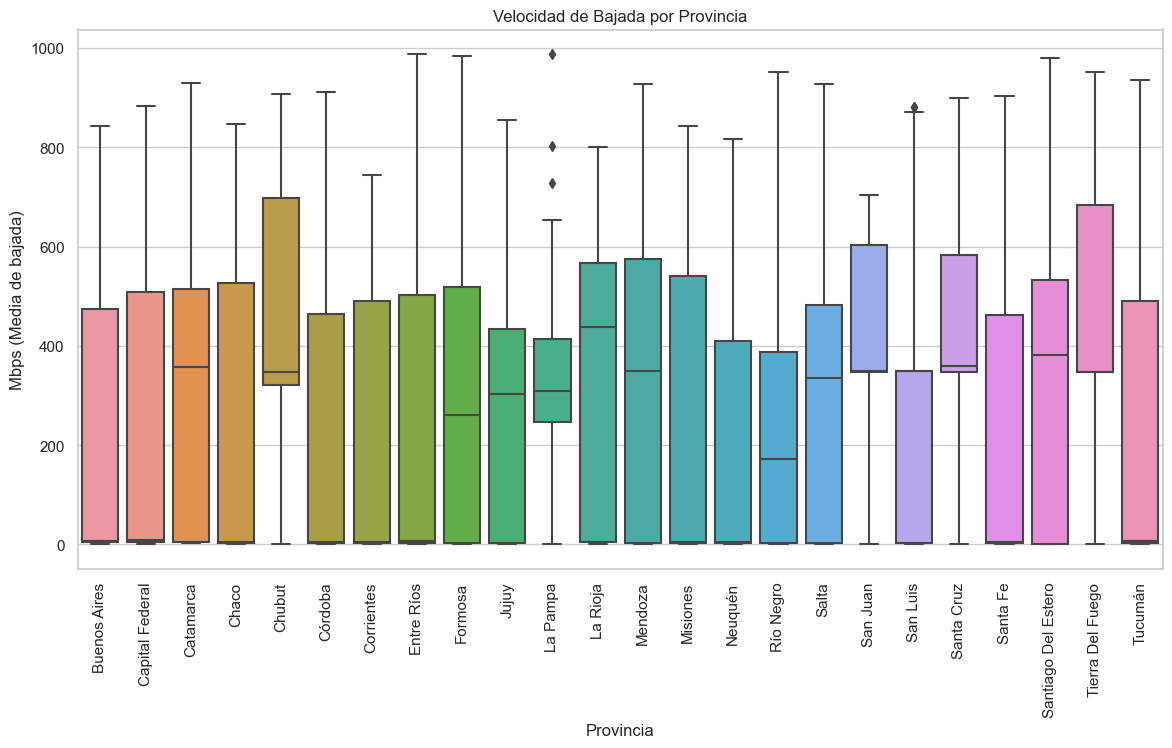

F_onewayResult(statistic=3.062397496174651, pvalue=2.0864749007514273e-06)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que el dataset está limpio y listo para el análisis
# Vamos a realizar algunos gráficos y análisis

# Histograma de la velocidad de bajada
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Mbps (Media de bajada)'], kde=True)
plt.title('Distribución de la Velocidad de Bajada')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de la velocidad de bajada por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=data_clean)
plt.title('Velocidad de Bajada por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

# Boxplot de la velocidad de bajada por provincia
plt.figure(figsize=(14, 7))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=data_clean)
plt.title('Velocidad de Bajada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=90)
plt.show()

# Análisis de la varianza de la velocidad de bajada por provincia
# usando ANOVA si es aplicable, necesitamos la biblioteca stats de scipy
from scipy import stats

# ANOVA requiere que los grupos tengan la misma varianza, que los datos sean aproximadamente normales
# y que las muestras sean independientes. Estas suposiciones no siempre se cumplen en los datos reales,
# pero ANOVA puede ser robusta a estas suposiciones bajo ciertas condiciones.

# Agrupar los datos por provincia y obtener un listado de velocidades para cada provincia
grouped_data = data_clean.groupby('Provincia')['Mbps (Media de bajada)'].apply(list)

# Lista de velocidades por provincia para ANOVA
speeds_per_province = [group for group in grouped_data]

# Realizar ANOVA
anova_results = stats.f_oneway(*speeds_per_province)

anova_results


- Histograma de la Velocidad de Bajada:
La distribución de la velocidad de bajada muestra una tendencia central con una cola larga hacia la derecha, indicando que hay algunas localidades con velocidades significativamente más altas que la mayoría.

- Boxplot de la Velocidad de Bajada por Trimestre:
El boxplot por trimestre muestra que hay variación en las medianas y en la dispersión de la velocidad de bajada entre los trimestres. Esto podría indicar fluctuaciones estacionales o cambios en la infraestructura de Internet a lo largo del año.

- Boxplot de la Velocidad de Bajada por Provincia:
Este gráfico muestra diferencias en la distribución de las velocidades de Internet entre las provincias. Algunas provincias tienen medianas más altas y rangos intercuartílicos más amplios, sugiriendo un mejor acceso a Internet o una mayor variabilidad dentro de la provincia.

>Análisis de la Varianza (ANOVA):
Use un ANOVA para comparar la media de la velocidad de bajada entre las provincias. El resultado muestra un valor F de aproximadamente 3.06 y un valor p muy pequeño (aproximadamente 2.09e-06), lo que sugiere que hay diferencias estadísticamente significativas en la velocidad de bajada entre las provincias.

**Conclusión:**

Existe una variabilidad significativa en la velocidad de bajada de Internet entre las provincias, y esta variabilidad es estadísticamente significativa.
Las fluctuaciones a lo largo de los trimestres podrían justificar una investigación adicional para determinar la causa de estas variaciones, como podrían ser inversiones en infraestructura o patrones de uso estacionales.
Las políticas y las inversiones en infraestructura de Internet deberían tener en cuenta estas diferencias para asegurar un acceso más equitativo y mejorar la calidad del servicio de Internet en las provincias con velocidades más bajas.

In [59]:
# Cargamos el dataset nuevamente debido al reinicio del estado de ejecución del código
file_path_new = 'Internet_Accesos-por-tecnologia.csv'
data_new = pd.read_csv(file_path_new)

# Verificamos los tipos de datos
data_types = data_new.dtypes

# Identificar duplicados
duplicates_new = data_new.duplicated().sum()
if duplicates_new > 0:
    data_new = data_new.drop_duplicates()

# Convertir todas las columnas numéricas a float, ignorando aquellas que no se pueden convertir
for col in data_new.columns[2:]:  # Asumimos que las dos primeras columnas no son numéricas
    data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

# Volver a calcular valores faltantes después de la conversión
missing_values_new = data_new.isnull().sum()

# Identificar y contar outliers
outliers_mask_new = data_new.apply(lambda col: detect_outliers_iqr(col) if np.issubdtype(col.dtype, np.number) else False)
total_outliers_new = outliers_mask_new.sum()

# Llenar valores faltantes con la mediana para columnas numéricas
for col in data_new.columns[2:]:
    if np.issubdtype(data_new[col].dtype, np.number):
        data_new[col].fillna(data_new[col].median(), inplace=True)

# Eliminar outliers reemplazándolos con la mediana para columnas numéricas
for col in data_new.columns[2:]:
    if np.issubdtype(data_new[col].dtype, np.number):
        outliers = detect_outliers_iqr(data_new[col])
        data_new.loc[outliers, col] = data_new[col].median()

# Resumen de limpieza
cleaning_summary_new = {
    "data_types_before": data_types,
    "duplicates_found": duplicates_new,
    "missing_values_after_conversion": missing_values_new,
    "total_outliers_detected": total_outliers_new,
    "data_shape_after_cleaning": data_new.shape
}

cleaning_summary_new


{'data_types_before': Año              int64
 Trimestre        int64
 ADSL             int64
 Cablemodem       int64
 Fibra óptica     int64
 Wireless         int64
 Otros            int64
 Total            int64
 Periodo         object
 dtype: object,
 'duplicates_found': 0,
 'missing_values_after_conversion': Año              0
 Trimestre        0
 ADSL             0
 Cablemodem       0
 Fibra óptica     0
 Wireless         0
 Otros            0
 Total            0
 Periodo         36
 dtype: int64,
 'total_outliers_detected': Año             0
 Trimestre       0
 ADSL            0
 Cablemodem      0
 Fibra óptica    4
 Wireless        0
 Otros           0
 Total           0
 Periodo         0
 dtype: int64,
 'data_shape_after_cleaning': (36, 9)}

- **Tipos de Datos Antes:** Todas las columnas, excepto 'Periodo', eran numéricas inicialmente.
- **Duplicados:** No se encontraron filas duplicadas en el dataset.
- **Valores Faltantes** Después de la Conversión: Se detectaron 36 valores faltantes en la columna 'Periodo', que parece ser una columna no numérica y que probablemente contenga fechas o identificadores de tiempo.
- **Outliers Detectados:** Se detectaron 4 outliers en la columna 'Fibra óptica'.


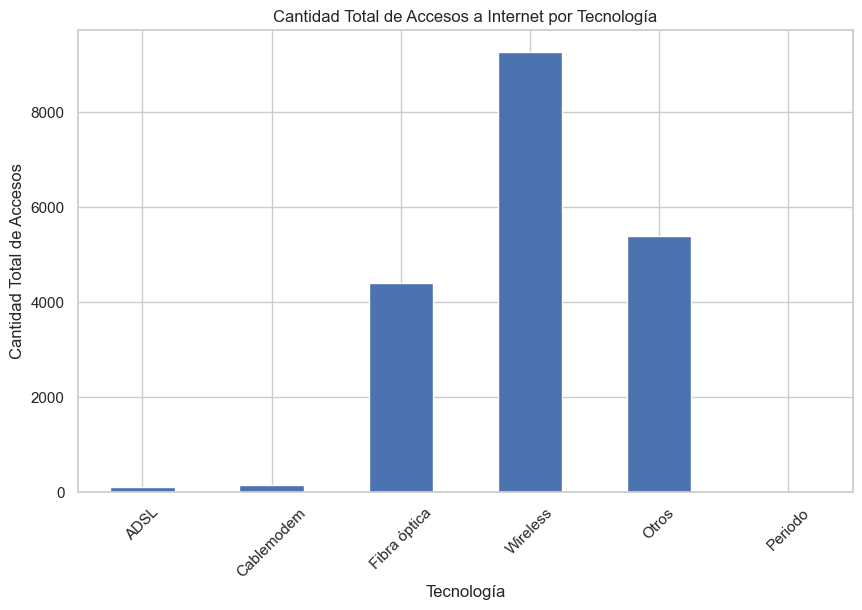

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,0.0
mean,3.083333,4.166667,122.388889,257.222222,149.500000,8.361111,NaN
std,1.079021,1.253566,96.036385,180.185319,85.497034,1.495761,NaN
min,1.000000,2.000000,1.000000,71.000000,54.000000,6.000000,NaN
25%,2.000000,3.000000,2.750000,85.000000,64.250000,7.000000,NaN
50%,4.000000,4.000000,157.000000,220.000000,116.500000,8.000000,NaN
75%,4.000000,5.000000,172.000000,415.250000,247.500000,9.250000,NaN
max,4.000000,6.000000,388.000000,573.000000,265.000000,11.000000,NaN


In [62]:
# Procederemos a generar gráficos y realizar un análisis de ellos



# Gráfico de barras para comparar la cantidad total de accesos por tecnología
plt.figure(figsize=(10, 6))
data_new[numeric_columns_new].sum().drop('Total').plot(kind='bar')  # Excluimos 'Total' para que no distorsione la comparación
plt.title('Cantidad Total de Accesos a Internet por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad Total de Accesos')
plt.xticks(rotation=45)
plt.show()

# Resumen descriptivo de los accesos por tecnología
descriptive_stats_new = data_new[numeric_columns_new].describe()

descriptive_stats_new


Gráfico de Barras para Accesos Totales por Tecnología:

El gráfico de barras compara la cantidad total de accesos a Internet por cada tecnología, excluyendo el total agregado para evitar la distorsión.
La tecnología 'Wireless' tiene el número más alto de accesos, seguida por 'Otros', lo que sugiere que estas tecnologías son las más utilizadas o las más disponibles.
Las tecnologías 'ADSL' y 'Cablemodem' tienen menos accesos en comparación, lo que podría reflejar una menor disponibilidad o preferencia por otras tecnologías.


- La tabla de estadísticas descriptivas proporciona un resumen de los accesos por tecnología.
- 'Fibra óptica' tiene una media alta y una gran desviación estándar, lo que indica una variabilidad significativa en los accesos entre las localidades.
- La tecnología 'Wireless' tiene la media más alta de accesos, lo que está en línea con lo que mostró el gráfico de barras.

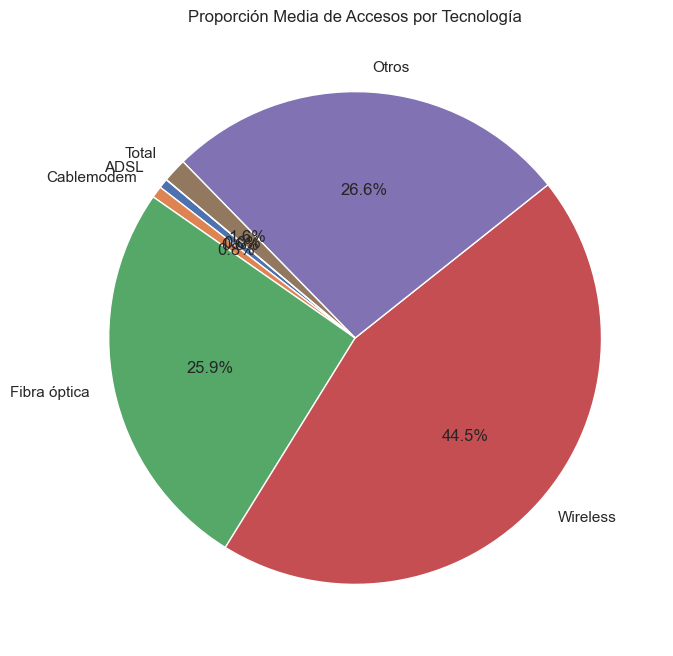

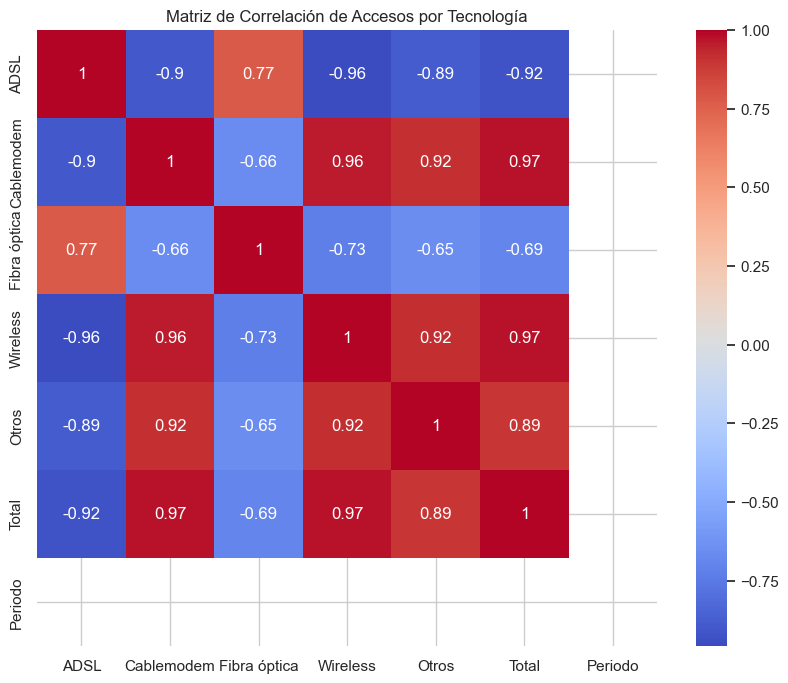

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,0.0
mean,3.083333,4.166667,122.388889,257.222222,149.500000,8.361111,NaN
std,1.079021,1.253566,96.036385,180.185319,85.497034,1.495761,NaN
min,1.000000,2.000000,1.000000,71.000000,54.000000,6.000000,NaN
25%,2.000000,3.000000,2.750000,85.000000,64.250000,7.000000,NaN
50%,4.000000,4.000000,157.000000,220.000000,116.500000,8.000000,NaN
75%,4.000000,5.000000,172.000000,415.250000,247.500000,9.250000,NaN
max,4.000000,6.000000,388.000000,573.000000,265.000000,11.000000,NaN


In [65]:
# Cargar el dataset nuevamente
file_path_new = 'Internet_Accesos-por-tecnologia.csv'
data_new = pd.read_csv(file_path_new)

# Convertir todas las columnas numéricas a float, ignorando aquellas que no se pueden convertir
numeric_columns_new = data_new.columns[2:]  # Asumiendo que las dos primeras columnas no son numéricas
data_new[numeric_columns_new] = data_new[numeric_columns_new].apply(pd.to_numeric, errors='coerce')

# Llenar valores faltantes con la mediana de cada columna numérica
data_new[numeric_columns_new] = data_new[numeric_columns_new].fillna(data_new[numeric_columns_new].median())

# Detección y eliminación de outliers
for col in numeric_columns_new:
    data_new[col] = data_new[col].where(~detect_outliers_iqr(data_new[col]), data_new[col].median())

# Análisis de proporciones
proportions = data_new[numeric_columns_new].div(data_new['Total'], axis=0)
proportions_mean = proportions.mean()

# Gráfico de proporciones
plt.figure(figsize=(10, 8))
proportions_mean.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporción Media de Accesos por Tecnología')
plt.ylabel('')  # Eliminar la etiqueta del eje y para un gráfico de pastel
plt.show()

# Análisis de correlación
correlation_matrix = data_new[numeric_columns_new].corr()

# Gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Accesos por Tecnología')
plt.show()

# Estadísticas descriptivas
descriptive_stats_new = data_new[numeric_columns_new].describe()
descriptive_stats_new


**Gráfico de Proporción Media de Accesos por Tecnología:**

- El gráfico de pastel muestra la contribución media de cada tecnología al total de accesos. Se observa que 'Wireless' y 'Otros' tienen las proporciones más grandes, lo que indica que son las tecnologías de acceso más comunes o que tienen mayor presencia en los datos.

- La tecnología 'ADSL' tiene la proporción más pequeña, lo que podría reflejar una menor relevancia o una transición hacia tecnologías más modernas.

**Matriz de Correlación de Accesos por Tecnología:**

- La matriz de correlación proporciona una vista de las relaciones entre las distintas tecnologías de acceso a Internet. Las tecnologías que están altamente correlacionadas pueden sugerir una adopción conjunta o complementaria en las mismas áreas geográficas.

- La correlación entre 'Fibra óptica' y 'Wireless' es particularmente alta, lo que podría indicar que las áreas con buena infraestructura de fibra óptica también tienden a tener un buen acceso inalámbrico, o viceversa.

**Estadísticas Descriptivas:**

- La tabla de estadísticas descriptivas proporciona un resumen de los datos por tecnología, con 'Wireless' mostrando los valores más altos en promedio, lo que concuerda con su alta proporción en el gráfico de pastel.

- La tecnología 'Fibra óptica' tiene una amplia gama de valores, desde el mínimo hasta el máximo, lo que indica una distribución variada de accesos entre las áreas.

**Conclusión:**

- Los análisis sugieren una distribución desigual de las tecnologías de acceso a Internet, con algunas tecnologías que dominan en términos de accesos.

- La alta correlación entre ciertas tecnologías podría indicar patrones de infraestructura o preferencias de consumo similares en determinadas áreas.